In [1]:
from pandas import read_csv, set_option
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

**Load Dataset**

In [6]:
filename = '/content/drive/MyDrive/Colab Notebooks/Ai/diabetes.csv'
dataset = read_csv(filename)

**Target Column**

In [7]:
x=dataset.drop("Outcome",axis=1)
y=dataset[("Outcome")]

**Split Dataset**

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2 , random_state=42)


**Cross Validation**

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

In [33]:
svm_classifier = SVC(kernel='linear')
#nb=GaussianNB()

In [34]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [37]:
cross_val_results = cross_val_score(svm_classifier,x_train , y_train, cv=kf)
#cross_val_results = cross_val_score(nb,x_train , y_train, cv=kf)

In [38]:
print(f'Cross-Validation Results (Accuracy)\n: {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy)
: [0.78861789 0.77235772 0.72357724 0.75609756 0.7704918 ]
Mean Accuracy: 0.7622284419565508


In [10]:
nb=GaussianNB()

**Accuracy+Classification Report**


In [ ]:
nb.fit(x_train,y_train)

In [12]:
y_pred=nb.predict(x_test)

In [13]:
accuracy=nb.score(x_test,y_test)

In [14]:
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[79 20]
 [16 39]]


In [16]:
print("Classification Report:\n",classification_report (y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



**ROC Curve**


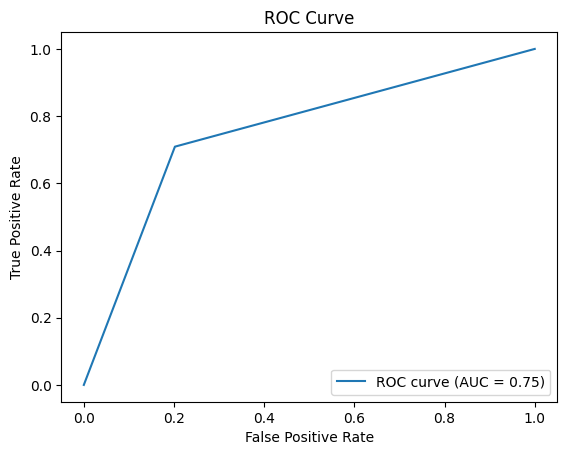

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve and AUC score.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
# Plot the ROC curve.
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()